___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf

pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
SEED = 42
keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum().any()

False

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [10]:
df.groupby('Geography')['Exited'].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: count, dtype: int64

In [11]:
df.groupby('Gender')['Exited'].value_counts()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: count, dtype: int64

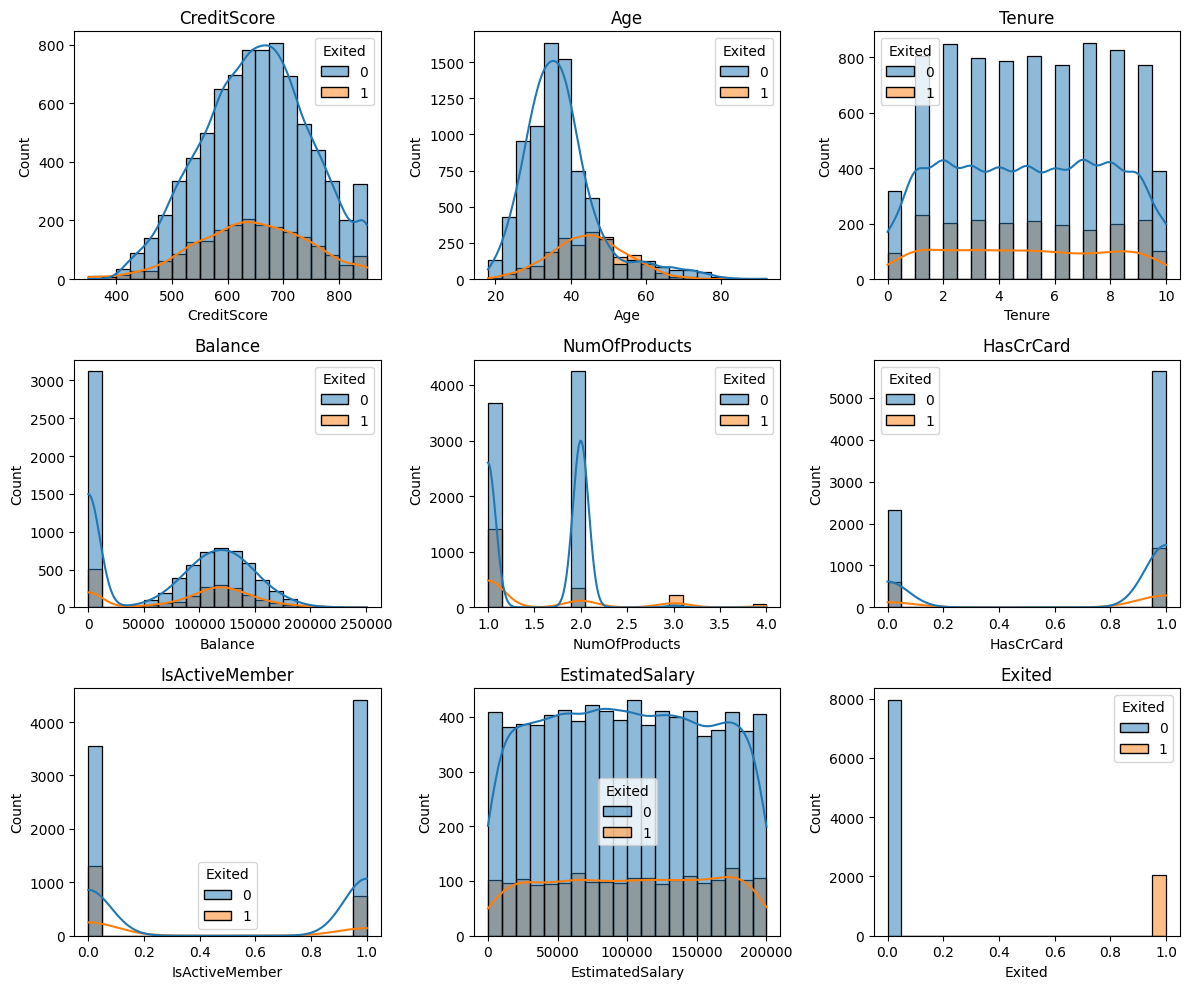

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

axes = axes.flatten()

# Iterate through each column and plot a histogram in the corresponding subplot
for i, column in enumerate(df.select_dtypes('number').columns):
    ax = axes[i]
    sns.histplot(data=df, x=column, bins=20,hue='Exited', kde=True, ax=ax) 
    ax.set_title(column)
    
plt.tight_layout()

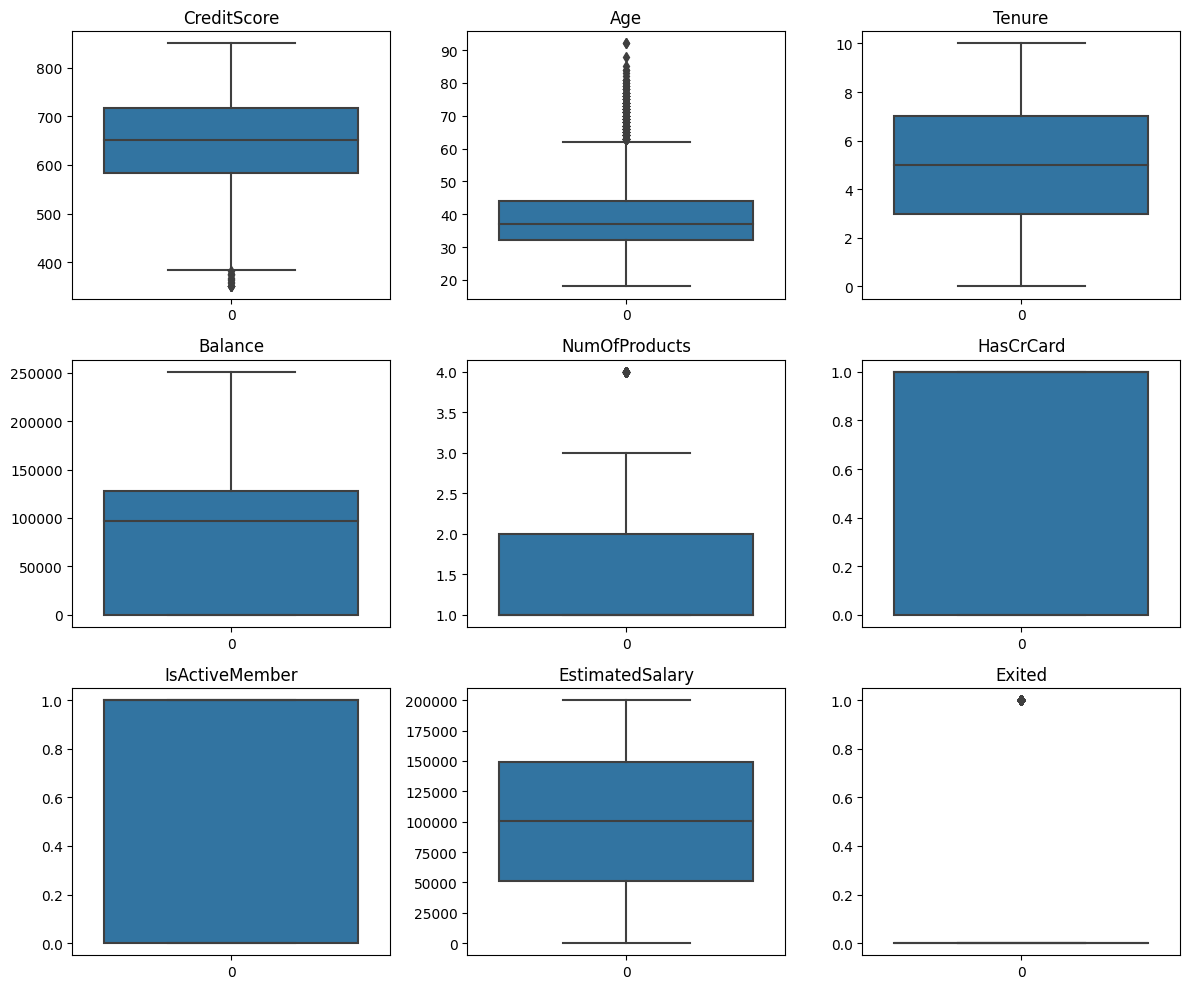

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

axes = axes.flatten()

# Iterate through each column and plot a histogram in the corresponding subplot
for i, column in enumerate(df.select_dtypes('number').columns):
    ax = axes[i]
    sns.boxplot(df[column],ax=ax) 
    ax.set_title(column)
    
plt.tight_layout()

In [14]:
#sns.pairplot(df, corner=True)
    

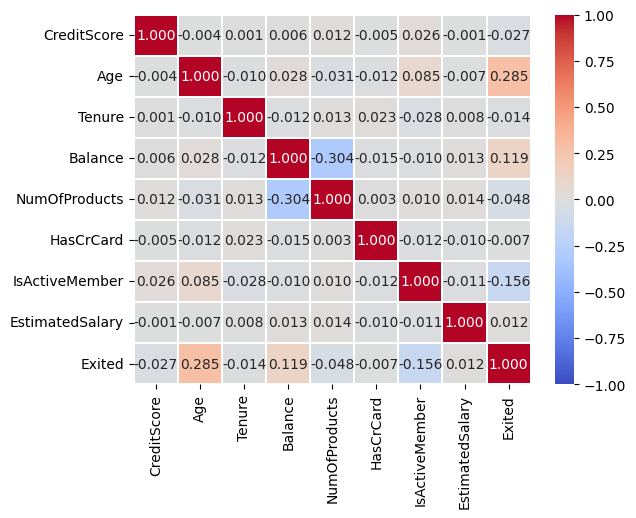

In [15]:
sns.heatmap(df.corr(numeric_only=True),vmin=-1,vmax=1,annot=True,cmap='coolwarm',fmt='.3f',linewidths=0.1);

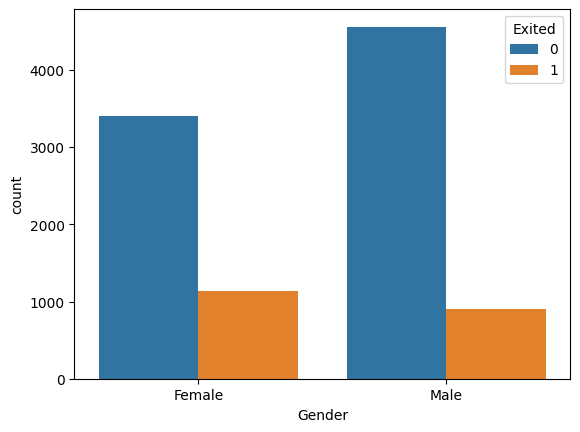

In [16]:
sns.countplot(x='Gender', hue='Exited', data=df);

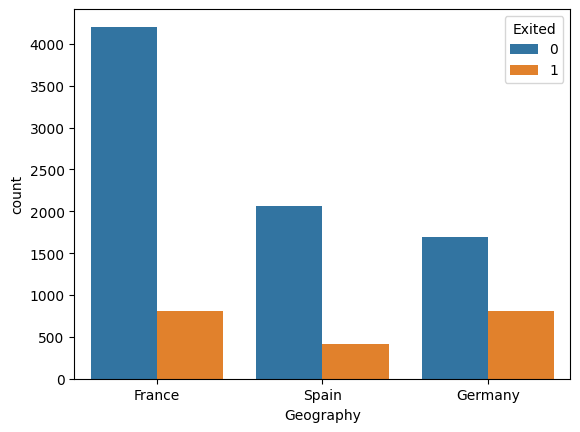

In [17]:
sns.countplot(x='Geography', hue='Exited', data=df);

In [18]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# Preprocessing of Data
- Train | Test Split, Scalling

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [107]:
X = df.drop(columns=['Exited'])
y = df.Exited

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,test_size=0.2)

In [109]:
X_train.shape

(8000, 10)

In [110]:
X_test.shape

(2000, 10)

In [111]:
X_train['Gender'].replace({'Female':1,'Male':0},inplace=True)
X_test['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [112]:
X_train = pd.get_dummies(X_train,columns = ['Geography'], dtype=int)
X_test = pd.get_dummies(X_test,columns = ['Geography'], dtype=int)

In [113]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, stratify=y_train,test_size=0.1)

In [114]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [116]:
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train_scaled.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [117]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 32)                416       
                                                                 
 dense_74 (Dense)            (None, 16)                528       
                                                                 
 dense_75 (Dense)            (None, 8)                 136       
                                                                 
 dense_76 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.fit(x=X_train_scaled, y=y_train, validation_data=(X_val_scaled,y_val), batch_size=32, epochs=200, verbose=1)

Epoch 1/200
225/225 [==============================] - 1s 2ms/step - loss: 0.5017 - accuracy: 0.7896 - val_loss: 0.4615 - val_accuracy: 0.7975
Epoch 2/200
225/225 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.8042 - val_loss: 0.4443 - val_accuracy: 0.8100
Epoch 3/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.8140 - val_loss: 0.4321 - val_accuracy: 0.8125
Epoch 4/200
225/225 [==============================] - 0s 1ms/step - loss: 0.4232 - accuracy: 0.8165 - val_loss: 0.4222 - val_accuracy: 0.8200
Epoch 5/200
225/225 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8274 - val_loss: 0.4110 - val_accuracy: 0.8238
Epoch 6/200
225/225 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8333 - val_loss: 0.3974 - val_accuracy: 0.8313
Epoch 7/200
225/225 [==============================] - 0s 1ms/step - loss: 0.3816 - accuracy: 0.8443 - val_loss: 0.3871 - val_accuracy: 0.8363

Epoch 58/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8667 - val_loss: 0.3616 - val_accuracy: 0.8475
Epoch 59/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8660 - val_loss: 0.3624 - val_accuracy: 0.8487
Epoch 60/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8679 - val_loss: 0.3694 - val_accuracy: 0.8475
Epoch 61/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8649 - val_loss: 0.3680 - val_accuracy: 0.8450
Epoch 62/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.8664 - val_loss: 0.3623 - val_accuracy: 0.8462
Epoch 63/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8647 - val_loss: 0.3624 - val_accuracy: 0.8475
Epoch 64/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8674 - val_loss: 0.3670 - val_accuracy:

Epoch 115/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8733 - val_loss: 0.3612 - val_accuracy: 0.8525
Epoch 116/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8708 - val_loss: 0.3639 - val_accuracy: 0.8550
Epoch 117/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8710 - val_loss: 0.3634 - val_accuracy: 0.8512
Epoch 118/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8724 - val_loss: 0.3677 - val_accuracy: 0.8525
Epoch 119/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8726 - val_loss: 0.3628 - val_accuracy: 0.8550
Epoch 120/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8696 - val_loss: 0.3616 - val_accuracy: 0.8537
Epoch 121/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8707 - val_loss: 0.3641 - val_ac

225/225 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8746 - val_loss: 0.3662 - val_accuracy: 0.8537
Epoch 172/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3014 - accuracy: 0.8751 - val_loss: 0.3703 - val_accuracy: 0.8500
Epoch 173/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3025 - accuracy: 0.8749 - val_loss: 0.3711 - val_accuracy: 0.8550
Epoch 174/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3016 - accuracy: 0.8740 - val_loss: 0.3662 - val_accuracy: 0.8525
Epoch 175/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8750 - val_loss: 0.3677 - val_accuracy: 0.8512
Epoch 176/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8737 - val_loss: 0.3702 - val_accuracy: 0.8512
Epoch 177/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.8756 - val_loss: 0.3735 - val_accuracy: 0.8500

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [120]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

,loss,accuracy,val_loss,val_accuracy
195,0.298,0.877,0.376,0.850
196,0.299,0.876,0.378,0.845
197,0.297,0.876,0.374,0.849
198,0.298,0.878,0.374,0.851
199,0.297,0.876,0.375,0.858


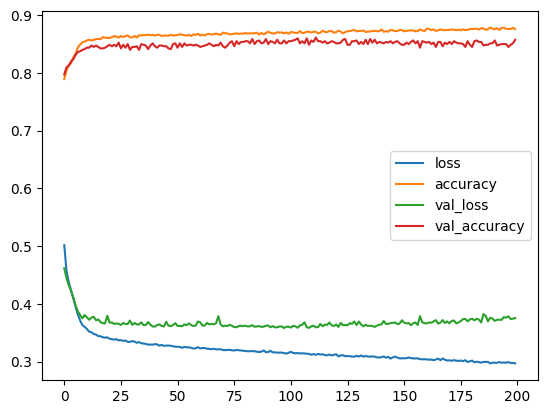

In [121]:
loss_df.plot()
plt.show()

In [122]:
model.evaluate(X_test_scaled, y_test, verbose=1)

63/63 [==============================] - 0s 1ms/step - loss: 0.3584 - accuracy: 0.8585


[0.35838642716407776, 0.8585000038146973]

In [123]:
y_pred = model.predict(X_test_scaled) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 945us/step
[[1537   56]
 [ 227  180]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.76      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



63/63 [==============================] - 0s 1ms/step


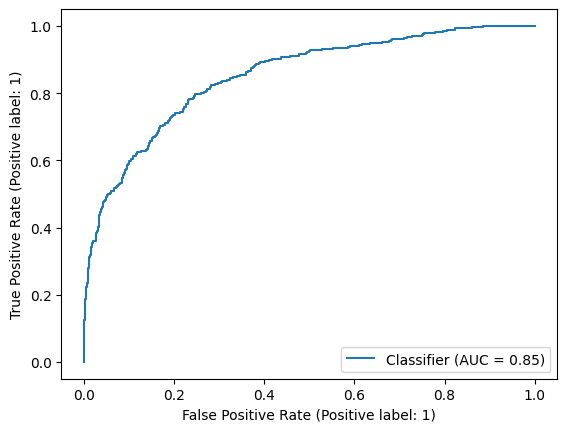

In [124]:
y_pred_proba = model.predict(X_test_scaled)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [125]:
roc_auc_score(y_test, y_pred_proba)

0.8510636985213257

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [126]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [127]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [128]:
model_weighted = Sequential()

model_weighted.add(Dense(32, activation="relu", input_dim=X_train_scaled.shape[1]))
model_weighted.add(Dense(16, activation="relu"))
model_weighted.add(Dense(8, activation="relu"))
model_weighted.add(Dense(1, activation="sigmoid"))

model_weighted.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [129]:
model_weighted.fit(x=X_train_scaled, y=y_train, validation_data=(X_val_scaled,y_val), batch_size=32, epochs=200, 
                   class_weight=class_weights,
                   verbose=1)

Epoch 1/200
225/225 [==============================] - 1s 2ms/step - loss: 0.6715 - accuracy: 0.5204 - val_loss: 0.6761 - val_accuracy: 0.6438
Epoch 2/200
225/225 [==============================] - 0s 1ms/step - loss: 0.6193 - accuracy: 0.6592 - val_loss: 0.6092 - val_accuracy: 0.6950
Epoch 3/200
225/225 [==============================] - 0s 1ms/step - loss: 0.5770 - accuracy: 0.6985 - val_loss: 0.5474 - val_accuracy: 0.7437
Epoch 4/200
225/225 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.7285 - val_loss: 0.5185 - val_accuracy: 0.7650
Epoch 5/200
225/225 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.7550 - val_loss: 0.5458 - val_accuracy: 0.7163
Epoch 6/200
225/225 [==============================] - 0s 1ms/step - loss: 0.5036 - accuracy: 0.7542 - val_loss: 0.5055 - val_accuracy: 0.7538
Epoch 7/200
225/225 [==============================] - 0s 1ms/step - loss: 0.4934 - accuracy: 0.7607 - val_loss: 0.5112 - val_accuracy: 0.7475

Epoch 58/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.8014 - val_loss: 0.4467 - val_accuracy: 0.7937
Epoch 59/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.7990 - val_loss: 0.4319 - val_accuracy: 0.8000
Epoch 60/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.8003 - val_loss: 0.5056 - val_accuracy: 0.7588
Epoch 61/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8022 - val_loss: 0.5429 - val_accuracy: 0.7275
Epoch 62/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.8007 - val_loss: 0.4616 - val_accuracy: 0.7837
Epoch 63/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.7986 - val_loss: 0.4537 - val_accuracy: 0.7875
Epoch 64/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8036 - val_loss: 0.5340 - val_accuracy:

Epoch 115/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8093 - val_loss: 0.4485 - val_accuracy: 0.7987
Epoch 116/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8111 - val_loss: 0.4270 - val_accuracy: 0.8075
Epoch 117/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8125 - val_loss: 0.5218 - val_accuracy: 0.7475
Epoch 118/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8085 - val_loss: 0.4567 - val_accuracy: 0.7900
Epoch 119/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8115 - val_loss: 0.5156 - val_accuracy: 0.7600
Epoch 120/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8097 - val_loss: 0.5035 - val_accuracy: 0.7550
Epoch 121/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8097 - val_loss: 0.5056 - val_ac

225/225 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8149 - val_loss: 0.5066 - val_accuracy: 0.7588
Epoch 172/200
225/225 [==============================] - 0s 1ms/step - loss: 0.3993 - accuracy: 0.8163 - val_loss: 0.4923 - val_accuracy: 0.7763
Epoch 173/200
225/225 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8149 - val_loss: 0.4771 - val_accuracy: 0.7775
Epoch 174/200
225/225 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.8176 - val_loss: 0.4747 - val_accuracy: 0.7750
Epoch 175/200
225/225 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.8140 - val_loss: 0.5313 - val_accuracy: 0.7475
Epoch 176/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8144 - val_loss: 0.5140 - val_accuracy: 0.7613
Epoch 177/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8188 - val_loss: 0.5002 - val_accuracy: 0.7788

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [131]:
loss_df2 = pd.DataFrame(model_weighted.history.history)
loss_df2.tail()

,loss,accuracy,val_loss,val_accuracy
195,0.394,0.821,0.539,0.751
196,0.394,0.818,0.542,0.749
197,0.394,0.818,0.511,0.764
198,0.394,0.815,0.501,0.775
199,0.390,0.825,0.457,0.801


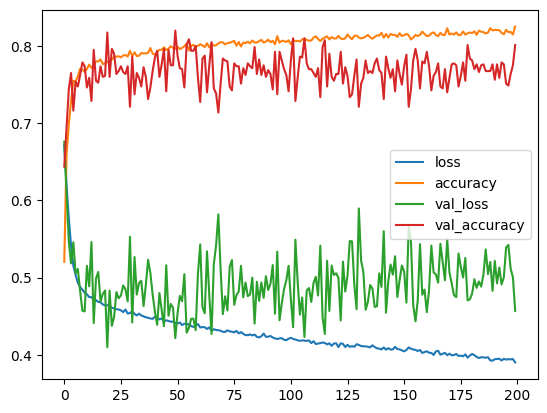

In [132]:
loss_df2.plot()
plt.show()

In [133]:
model_weighted.evaluate(X_test_scaled, y_test, verbose=1)

63/63 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.7965


[0.4295681118965149, 0.796500027179718]

In [134]:
y_pred2 = model_weighted.predict(X_test_scaled) > 0.5
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

63/63 [==============================] - 0s 1ms/step
[[1325  268]
 [ 139  268]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1593
           1       0.50      0.66      0.57       407

    accuracy                           0.80      2000
   macro avg       0.70      0.75      0.72      2000
weighted avg       0.82      0.80      0.81      2000



63/63 [==============================] - 0s 2ms/step


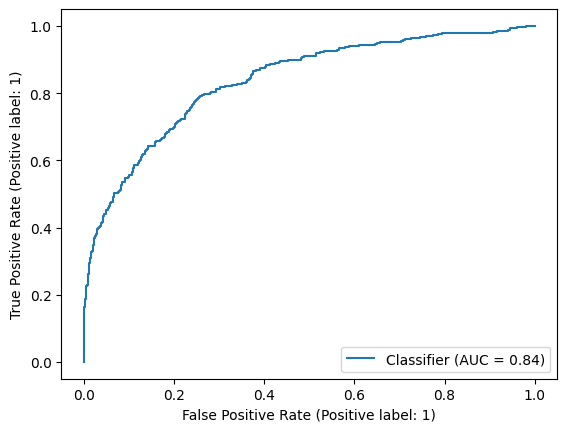

In [135]:
y_pred2_proba = model_weighted.predict(X_test_scaled)
RocCurveDisplay.from_predictions(y_test, y_pred2_proba)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

In [46]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
from tensorflow.keras.layers import Dropout

### Increase The Learning Rate and Observe The Results

In [136]:
model_lrate = Sequential()

model_lrate.add(Dense(32, activation="relu", input_dim=X_train_scaled.shape[1]))
model_lrate.add(Dense(16, activation="relu"))
model_lrate.add(Dense(8, activation="relu"))
model_lrate.add(Dense(1, activation="sigmoid"))

model_lrate.compile(optimizer=Adam(learning_rate=0.005), loss="binary_crossentropy", metrics=["accuracy"])

In [137]:
model_lrate.fit(x=X_train_scaled, y=y_train, validation_data=(X_val_scaled,y_val), batch_size=32, epochs=200, 
                   verbose=1)

Epoch 1/200
225/225 [==============================] - 1s 3ms/step - loss: 0.4668 - accuracy: 0.8021 - val_loss: 0.4308 - val_accuracy: 0.8188
Epoch 2/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8304 - val_loss: 0.4094 - val_accuracy: 0.8313
Epoch 3/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8460 - val_loss: 0.3792 - val_accuracy: 0.8438
Epoch 4/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8551 - val_loss: 0.3861 - val_accuracy: 0.8475
Epoch 5/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8579 - val_loss: 0.3694 - val_accuracy: 0.8500
Epoch 6/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8581 - val_loss: 0.3646 - val_accuracy: 0.8500
Epoch 7/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8560 - val_loss: 0.3671 - val_accuracy: 0.8438

Epoch 58/200
225/225 [==============================] - 0s 1ms/step - loss: 0.3115 - accuracy: 0.8682 - val_loss: 0.3763 - val_accuracy: 0.8587
Epoch 59/200
225/225 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.8712 - val_loss: 0.4040 - val_accuracy: 0.8450
Epoch 60/200
225/225 [==============================] - 0s 1ms/step - loss: 0.3115 - accuracy: 0.8692 - val_loss: 0.3907 - val_accuracy: 0.8612
Epoch 61/200
225/225 [==============================] - 0s 1ms/step - loss: 0.3112 - accuracy: 0.8712 - val_loss: 0.3884 - val_accuracy: 0.8500
Epoch 62/200
225/225 [==============================] - 0s 1ms/step - loss: 0.3088 - accuracy: 0.8701 - val_loss: 0.3945 - val_accuracy: 0.8512
Epoch 63/200
225/225 [==============================] - 0s 1ms/step - loss: 0.3114 - accuracy: 0.8696 - val_loss: 0.3906 - val_accuracy: 0.8450
Epoch 64/200
225/225 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8704 - val_loss: 0.4011 - val_accuracy:

Epoch 115/200
225/225 [==============================] - 0s 1ms/step - loss: 0.2889 - accuracy: 0.8781 - val_loss: 0.4493 - val_accuracy: 0.8438
Epoch 116/200
225/225 [==============================] - 0s 1ms/step - loss: 0.2875 - accuracy: 0.8779 - val_loss: 0.4640 - val_accuracy: 0.8450
Epoch 117/200
225/225 [==============================] - 0s 1ms/step - loss: 0.2871 - accuracy: 0.8779 - val_loss: 0.4761 - val_accuracy: 0.8300
Epoch 118/200
225/225 [==============================] - 0s 1ms/step - loss: 0.2877 - accuracy: 0.8775 - val_loss: 0.4401 - val_accuracy: 0.8325
Epoch 119/200
225/225 [==============================] - 0s 1ms/step - loss: 0.2927 - accuracy: 0.8765 - val_loss: 0.4717 - val_accuracy: 0.8375
Epoch 120/200
225/225 [==============================] - 0s 1ms/step - loss: 0.2904 - accuracy: 0.8754 - val_loss: 0.4628 - val_accuracy: 0.8450
Epoch 121/200
225/225 [==============================] - 0s 1ms/step - loss: 0.2851 - accuracy: 0.8792 - val_loss: 0.4704 - val_ac

225/225 [==============================] - 0s 1ms/step - loss: 0.2733 - accuracy: 0.8853 - val_loss: 0.5303 - val_accuracy: 0.8275
Epoch 172/200
225/225 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.8847 - val_loss: 0.5000 - val_accuracy: 0.8462
Epoch 173/200
225/225 [==============================] - 0s 1ms/step - loss: 0.2779 - accuracy: 0.8817 - val_loss: 0.5010 - val_accuracy: 0.8263
Epoch 174/200
225/225 [==============================] - 0s 1ms/step - loss: 0.2767 - accuracy: 0.8818 - val_loss: 0.5217 - val_accuracy: 0.8288
Epoch 175/200
225/225 [==============================] - 0s 1ms/step - loss: 0.2734 - accuracy: 0.8851 - val_loss: 0.5070 - val_accuracy: 0.8288
Epoch 176/200
225/225 [==============================] - 0s 1ms/step - loss: 0.2754 - accuracy: 0.8851 - val_loss: 0.5356 - val_accuracy: 0.8375
Epoch 177/200
225/225 [==============================] - 0s 1ms/step - loss: 0.2763 - accuracy: 0.8836 - val_loss: 0.5330 - val_accuracy: 0.8288

In [138]:
loss_df3 = pd.DataFrame(model_lrate.history.history)
loss_df3.tail()

,loss,accuracy,val_loss,val_accuracy
195,0.271,0.886,0.555,0.824
196,0.266,0.887,0.574,0.822
197,0.273,0.886,0.553,0.819
198,0.277,0.882,0.559,0.812
199,0.274,0.881,0.563,0.829


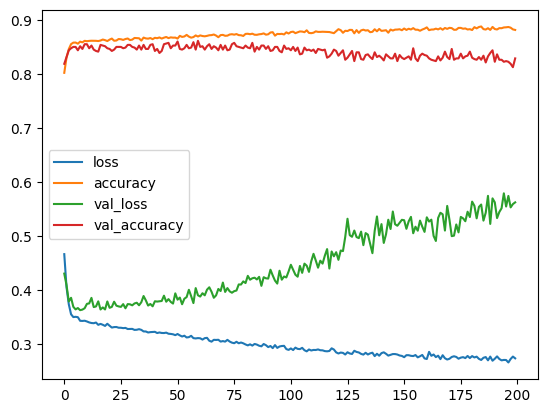

In [139]:
loss_df3.plot()
plt.show()

In [140]:
y_pred3 = model_lrate.predict(X_test_scaled) > 0.5
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

63/63 [==============================] - 0s 1ms/step
[[1512   81]
 [ 219  188]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.70      0.46      0.56       407

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



63/63 [==============================] - 0s 2ms/step


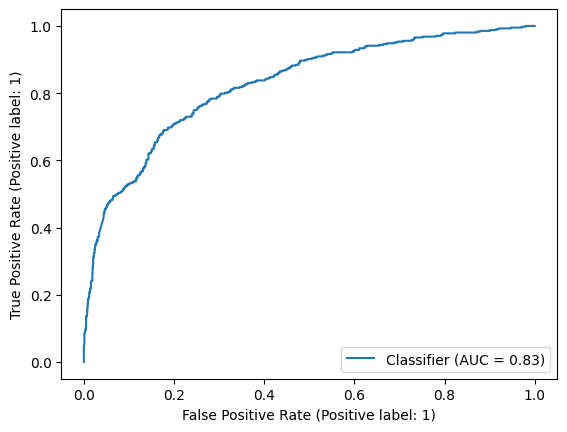

In [141]:
y_pred3_proba = model_lrate.predict(X_test_scaled)
RocCurveDisplay.from_predictions(y_test, y_pred3_proba)

### Add Dropout Layer

In [160]:
model_dropout = Sequential()

model_dropout.add(Dense(32, activation="relu", input_dim=X_train_scaled.shape[1]))
model_dropout.add(Dropout(0.5))

model_dropout.add(Dense(16, activation="relu"))
model_dropout.add(Dropout(0.5))

model_dropout.add(Dense(8, activation="relu"))
model_dropout.add(Dropout(0.5))

model_dropout.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model_dropout.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [161]:
model_dropout.fit(x=X_train_scaled, y=y_train, validation_data=(X_val_scaled,y_val), batch_size=32, epochs=200, 
                   verbose=1)

Epoch 1/200
225/225 [==============================] - 2s 7ms/step - loss: 0.5461 - accuracy: 0.7808 - val_loss: 0.4794 - val_accuracy: 0.7962
Epoch 2/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.7962 - val_loss: 0.4718 - val_accuracy: 0.7962
Epoch 3/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7962 - val_loss: 0.4567 - val_accuracy: 0.7962
Epoch 4/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7962 - val_loss: 0.4564 - val_accuracy: 0.7962
Epoch 5/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.7976 - val_loss: 0.4344 - val_accuracy: 0.7962
Epoch 6/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.8015 - val_loss: 0.4161 - val_accuracy: 0.8012
Epoch 7/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.8068 - val_loss: 0.4300 - val_accuracy: 0.8037

Epoch 58/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8308 - val_loss: 0.3638 - val_accuracy: 0.8413
Epoch 59/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8276 - val_loss: 0.3715 - val_accuracy: 0.8388
Epoch 60/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8335 - val_loss: 0.3666 - val_accuracy: 0.8462
Epoch 61/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8240 - val_loss: 0.3768 - val_accuracy: 0.8338
Epoch 62/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8272 - val_loss: 0.3705 - val_accuracy: 0.8475
Epoch 63/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8268 - val_loss: 0.3647 - val_accuracy: 0.8438
Epoch 64/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8242 - val_loss: 0.3787 - val_accuracy:

Epoch 115/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8301 - val_loss: 0.3594 - val_accuracy: 0.8462
Epoch 116/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8271 - val_loss: 0.3617 - val_accuracy: 0.8413
Epoch 117/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8335 - val_loss: 0.3646 - val_accuracy: 0.8525
Epoch 118/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8289 - val_loss: 0.3688 - val_accuracy: 0.8388
Epoch 119/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8321 - val_loss: 0.3712 - val_accuracy: 0.8450
Epoch 120/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8307 - val_loss: 0.3656 - val_accuracy: 0.8512
Epoch 121/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8306 - val_loss: 0.3708 - val_ac

225/225 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8340 - val_loss: 0.3760 - val_accuracy: 0.8475
Epoch 172/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8282 - val_loss: 0.3728 - val_accuracy: 0.8450
Epoch 173/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8285 - val_loss: 0.3624 - val_accuracy: 0.8462
Epoch 174/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8344 - val_loss: 0.3690 - val_accuracy: 0.8413
Epoch 175/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8344 - val_loss: 0.3755 - val_accuracy: 0.8413
Epoch 176/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8333 - val_loss: 0.3674 - val_accuracy: 0.8475
Epoch 177/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8285 - val_loss: 0.3703 - val_accuracy: 0.8450

In [162]:
loss_drop = pd.DataFrame(model_dropout.history.history)

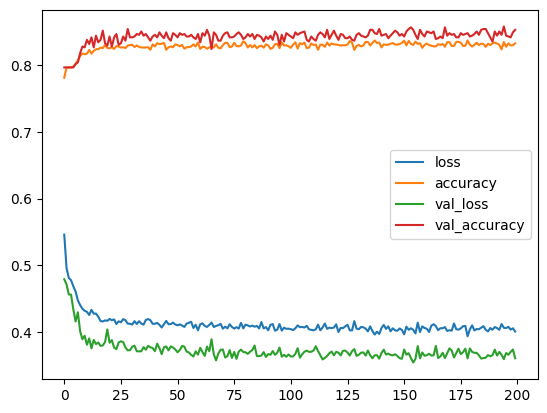

In [163]:
loss_drop.plot()
plt.show()

In [164]:
y_pred_d = model_dropout.predict(X_test_scaled) > 0.5
print(confusion_matrix(y_test, y_pred_d))
print(classification_report(y_test, y_pred_d))

63/63 [==============================] - 0s 1ms/step
[[1551   42]
 [ 242  165]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.41      0.54       407

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



63/63 [==============================] - 0s 986us/step


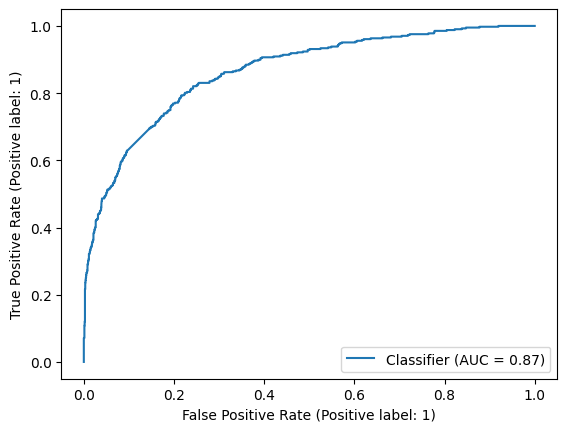

In [165]:
y_predd_proba = model_dropout.predict(X_test_scaled)
RocCurveDisplay.from_predictions(y_test, y_predd_proba)

### Add Early Stop

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

#### Monitor the "val_loss" as metric

In [170]:
early_stop1 = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 50,restore_best_weights=True)

In [171]:
model_vloss = Sequential()

model_vloss.add(Dense(32, activation="relu", input_dim=X_train_scaled.shape[1]))
model_vloss.add(Dropout(0.5))

model_vloss.add(Dense(16, activation="relu"))
model_vloss.add(Dropout(0.4))

model_vloss.add(Dense(8, activation="relu"))
model_vloss.add(Dropout(0.3))

model_vloss.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model_vloss.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy",keras.metrics.Recall(name='recall')])

In [172]:
model_vloss.fit(x=X_train_scaled, y=y_train, validation_data=(X_val_scaled,y_val), batch_size=32, epochs=500, 
                   callbacks = [early_stop1], verbose=1)

Epoch 1/500
225/225 [==============================] - 2s 4ms/step - loss: 0.5219 - accuracy: 0.7921 - recall: 0.0075 - val_loss: 0.4781 - val_accuracy: 0.7962 - val_recall: 0.0000e+00
Epoch 2/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7962 - recall: 0.0000e+00 - val_loss: 0.4595 - val_accuracy: 0.7962 - val_recall: 0.0000e+00
Epoch 3/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.7962 - recall: 0.0000e+00 - val_loss: 0.4556 - val_accuracy: 0.7962 - val_recall: 0.0000e+00
Epoch 4/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7962 - recall: 0.0000e+00 - val_loss: 0.4540 - val_accuracy: 0.7962 - val_recall: 0.0000e+00
Epoch 5/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4648 - accuracy: 0.7962 - recall: 0.0000e+00 - val_loss: 0.4411 - val_accuracy: 0.7962 - val_recall: 0.0000e+00
Epoch 6/500
225/225 [==============================] - 0s 2

Epoch 45/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8136 - recall: 0.1350 - val_loss: 0.3795 - val_accuracy: 0.8413 - val_recall: 0.3252
Epoch 46/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8243 - recall: 0.2147 - val_loss: 0.3785 - val_accuracy: 0.8450 - val_recall: 0.3681
Epoch 47/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8285 - recall: 0.2911 - val_loss: 0.3812 - val_accuracy: 0.8500 - val_recall: 0.3804
Epoch 48/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8247 - recall: 0.2543 - val_loss: 0.3858 - val_accuracy: 0.8462 - val_recall: 0.3558
Epoch 49/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8239 - recall: 0.2543 - val_loss: 0.3779 - val_accuracy: 0.8487 - val_recall: 0.3374
Epoch 50/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4217 - accur

Epoch 90/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8275 - recall: 0.2543 - val_loss: 0.3862 - val_accuracy: 0.8438 - val_recall: 0.4294
Epoch 91/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8360 - recall: 0.3074 - val_loss: 0.3826 - val_accuracy: 0.8487 - val_recall: 0.4417
Epoch 92/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.8247 - recall: 0.2733 - val_loss: 0.3773 - val_accuracy: 0.8425 - val_recall: 0.3926
Epoch 93/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8214 - recall: 0.2481 - val_loss: 0.4006 - val_accuracy: 0.8500 - val_recall: 0.4294
Epoch 94/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8178 - recall: 0.2038 - val_loss: 0.3799 - val_accuracy: 0.8537 - val_recall: 0.3988
Epoch 95/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4144 - accur

In [173]:
y_pred_vl = model_vloss.predict(X_test_scaled) > 0.5
print(confusion_matrix(y_test, y_pred_vl))
print(classification_report(y_test, y_pred_vl))

63/63 [==============================] - 0s 1ms/step
[[1537   56]
 [ 243  164]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1593
           1       0.75      0.40      0.52       407

    accuracy                           0.85      2000
   macro avg       0.80      0.68      0.72      2000
weighted avg       0.84      0.85      0.83      2000



#### Monitor the "val_recall" as metric

In [175]:
early_stop2 = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 50, restore_best_weights=True)

In [176]:
model_vr = Sequential()

model_vr.add(Dense(32, activation="relu", input_dim=X_train_scaled.shape[1]))
model_vr.add(Dropout(0.5))

model_vr.add(Dense(16, activation="relu"))
model_vr.add(Dropout(0.5))

model_vr.add(Dense(8, activation="relu"))
model_vr.add(Dropout(0.5))

model_vr.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model_vr.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy",tf.keras.metrics.Recall(name='recall')])

In [177]:
model_vr.fit(x=X_train_scaled, y=y_train, validation_data=(X_val_scaled,y_val), batch_size=32, epochs=500, 
                callbacks = [early_stop2], verbose=1)

Epoch 1/500
225/225 [==============================] - 2s 4ms/step - loss: 0.5309 - accuracy: 0.7876 - recall: 0.0279 - val_loss: 0.4752 - val_accuracy: 0.7962 - val_recall: 0.0000e+00
Epoch 2/500
225/225 [==============================] - 1s 2ms/step - loss: 0.4982 - accuracy: 0.7962 - recall: 0.0000e+00 - val_loss: 0.4797 - val_accuracy: 0.7962 - val_recall: 0.0000e+00
Epoch 3/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7969 - recall: 0.0150 - val_loss: 0.4557 - val_accuracy: 0.7962 - val_recall: 0.0000e+00
Epoch 4/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7992 - recall: 0.0395 - val_loss: 0.4458 - val_accuracy: 0.7962 - val_recall: 0.0000e+00
Epoch 5/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7989 - recall: 0.0525 - val_loss: 0.4377 - val_accuracy: 0.8037 - val_recall: 0.0368
Epoch 6/500
225/225 [==============================] - 0s 2ms/step - loss: 

Epoch 46/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8268 - recall: 0.2563 - val_loss: 0.3647 - val_accuracy: 0.8537 - val_recall: 0.4724
Epoch 47/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8274 - recall: 0.2740 - val_loss: 0.3776 - val_accuracy: 0.8400 - val_recall: 0.3067
Epoch 48/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8238 - recall: 0.2345 - val_loss: 0.3804 - val_accuracy: 0.8350 - val_recall: 0.2393
Epoch 49/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8203 - recall: 0.2434 - val_loss: 0.3738 - val_accuracy: 0.8400 - val_recall: 0.2883
Epoch 50/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8247 - recall: 0.2454 - val_loss: 0.3813 - val_accuracy: 0.8275 - val_recall: 0.2025
Epoch 51/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4129 - accur

225/225 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8282 - recall: 0.2454 - val_loss: 0.3749 - val_accuracy: 0.8425 - val_recall: 0.3436
Epoch 92/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8297 - recall: 0.2570 - val_loss: 0.3677 - val_accuracy: 0.8475 - val_recall: 0.4356
Epoch 93/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8301 - recall: 0.2556 - val_loss: 0.3697 - val_accuracy: 0.8425 - val_recall: 0.3129
Epoch 93: early stopping


In [178]:
loss_vr = pd.DataFrame(model_vr.history.history)
loss_vr.head()

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
0,0.531,0.788,0.028,0.475,0.796,0.000
1,0.498,0.796,0.000,0.480,0.796,0.000
2,0.477,0.797,0.015,0.456,0.796,0.000
3,0.475,0.799,0.040,0.446,0.796,0.000
4,0.466,0.799,0.052,0.438,0.804,0.037


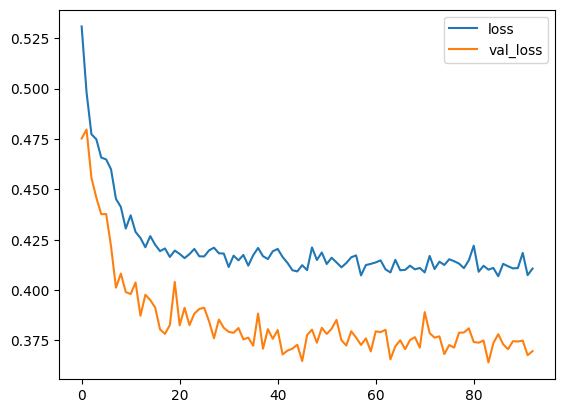

In [179]:
loss_vr[['loss','val_loss']].plot()
plt.show()

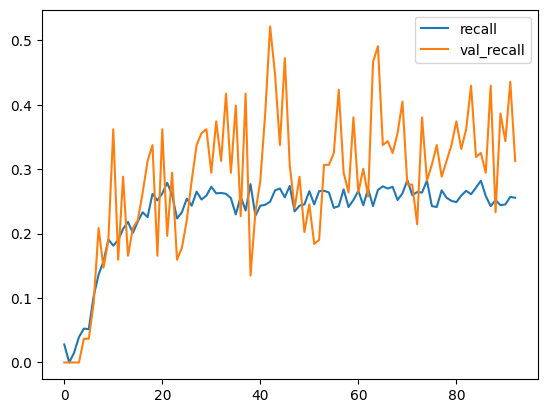

In [180]:
loss_vr[['recall','val_recall']].plot()
plt.show()

In [181]:
y_pred_vr = model_vr.predict(X_test_scaled) > 0.5
print(confusion_matrix(y_test, y_pred_vr))
print(classification_report(y_test, y_pred_vr))

63/63 [==============================] - 0s 1ms/step
[[1485  108]
 [ 190  217]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.67      0.53      0.59       407

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000



63/63 [==============================] - 0s 2ms/step


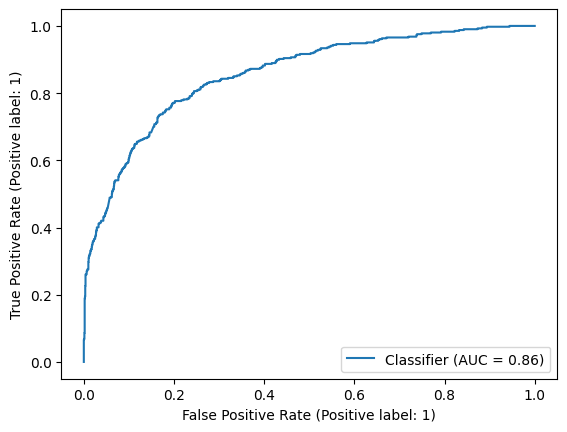

In [182]:
y_predvr_proba = model_vr.predict(X_test_scaled)
RocCurveDisplay.from_predictions(y_test, y_predvr_proba)

## Optuna

In [69]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [70]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=50, restore_best_weights=True
)

In [185]:
#trial_metric = "accuracy"
batch_size = 32


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)
    
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train_scaled.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=['accuracy',tf.keras.metrics.Recall(name='recall')],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val_scaled, y_val),
        batch_size=batch_size,
        epochs=300,
        callbacks=[early_stop2],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test_scaled, y_test, verbose=0)[1]
    return score

In [186]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-11-21 16:19:22,935] A new study created in memory with name: no-name-604c178b-07ba-4fb1-9ea3-92106dff0c1e
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.rmsprop.

Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping


[I 2023-11-21 16:19:43,508] Trial 0 finished with value: 0.43050000071525574 and parameters: {'n_units1': 35, 'n_units2': 123, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.003878981956644296, 'w0': 2.3389958508655595, 'w1': 0.04537474844486411}. Best is trial 0 with value: 0.43050000071525574.
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-pac

Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping


[I 2023-11-21 16:20:01,211] Trial 1 finished with value: 0.24400000274181366 and parameters: {'n_units1': 44, 'n_units2': 15, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.0010406371451015235, 'w0': 0.11678232399776779, 'w1': 0.5197275205403631}. Best is trial 0 with value: 0.43050000071525574.
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-packa

Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping


[I 2023-11-21 16:20:18,361] Trial 2 finished with value: 0.20350000262260437 and parameters: {'n_units1': 23, 'n_units2': 88, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 3.85629869213601e-05, 'w0': 0.40773681931956063, 'w1': 0.3995852124318592}. Best is trial 0 with value: 0.43050000071525574.
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\sit

Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping


[I 2023-11-21 16:20:35,395] Trial 3 finished with value: 0.21850000321865082 and parameters: {'n_units1': 11, 'n_units2': 113, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.0004205807011018658, 'w0': 0.12416896249713011, 'w1': 0.015965688292100166}. Best is trial 0 with value: 0.43050000071525574.
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib

Restoring model weights from the end of the best epoch: 49.
Epoch 99: early stopping


[I 2023-11-21 16:21:11,818] Trial 4 finished with value: 0.637499988079071 and parameters: {'n_units1': 92, 'n_units2': 118, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 7.022678135992255e-05, 'w0': 0.047373449221589994, 'w1': 0.026514344169138455}. Best is trial 4 with value: 0.637499988079071.
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-packa

Restoring model weights from the end of the best epoch: 3.
Epoch 53: early stopping


[I 2023-11-21 16:21:31,189] Trial 5 finished with value: 0.20649999380111694 and parameters: {'n_units1': 9, 'n_units2': 37, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 9.084621146983005e-05, 'w0': 3.1172911456825054, 'w1': 1.1118443897274153}. Best is trial 4 with value: 0.637499988079071.
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-package

Restoring model weights from the end of the best epoch: 3.
Epoch 53: early stopping


[I 2023-11-21 16:21:50,879] Trial 6 finished with value: 0.7540000081062317 and parameters: {'n_units1': 117, 'n_units2': 83, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.011304542762192357, 'w0': 1.8526935248572411, 'w1': 0.03213125863542897}. Best is trial 6 with value: 0.7540000081062317.
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-packa

Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping


[I 2023-11-21 16:22:08,508] Trial 7 finished with value: 0.796500027179718 and parameters: {'n_units1': 55, 'n_units2': 24, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.010647213736555238, 'w0': 1.8444415956450297, 'w1': 0.07403701392825467}. Best is trial 7 with value: 0.796500027179718.
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-packages\o

Restoring model weights from the end of the best epoch: 7.
Epoch 57: early stopping


[I 2023-11-21 16:22:31,138] Trial 8 finished with value: 0.25949999690055847 and parameters: {'n_units1': 126, 'n_units2': 55, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.00518355267818296, 'w0': 2.0606080528408133, 'w1': 2.336877134719881}. Best is trial 7 with value: 0.796500027179718.
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\mathe\anaconda3\lib\site-packages\o

Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping


[I 2023-11-21 16:22:49,449] Trial 9 finished with value: 0.6729999780654907 and parameters: {'n_units1': 75, 'n_units2': 27, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.008094585621551237, 'w0': 2.1531021389351843, 'w1': 0.02846393556562351}. Best is trial 7 with value: 0.796500027179718.


{'n_units1': 55,
 'n_units2': 24,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'learning_rate': 0.010647213736555238,
 'w0': 1.8444415956450297,
 'w1': 0.07403701392825467}

In [187]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=['accuracy',tf.keras.metrics.Recall(name='recall')])

# train model
model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=200,
    callbacks=[early_stop2],
    verbose=1,
)

Epoch 1/200
225/225 [==============================] - 2s 4ms/step - loss: 0.4606 - accuracy: 0.8053 - recall: 0.1152 - val_loss: 0.4308 - val_accuracy: 0.8188 - val_recall: 0.1472
Epoch 2/200
225/225 [==============================] - 1s 2ms/step - loss: 0.4129 - accuracy: 0.8282 - recall: 0.2911 - val_loss: 0.4286 - val_accuracy: 0.8263 - val_recall: 0.2147
Epoch 3/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8375 - recall: 0.3313 - val_loss: 0.3886 - val_accuracy: 0.8388 - val_recall: 0.2761
Epoch 4/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3650 - accuracy: 0.8487 - recall: 0.3851 - val_loss: 0.4000 - val_accuracy: 0.8450 - val_recall: 0.2945
Epoch 5/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8540 - recall: 0.4254 - val_loss: 0.3721 - val_accuracy: 0.8462 - val_recall: 0.4110
Epoch 6/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0

225/225 [==============================] - 0s 1ms/step - loss: 0.3192 - accuracy: 0.8697 - recall: 0.4990 - val_loss: 0.3826 - val_accuracy: 0.8475 - val_recall: 0.4969
Epoch 47/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8690 - recall: 0.4969 - val_loss: 0.3835 - val_accuracy: 0.8562 - val_recall: 0.4417
Epoch 48/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.8687 - recall: 0.4997 - val_loss: 0.3982 - val_accuracy: 0.8537 - val_recall: 0.4663
Epoch 49/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8721 - recall: 0.4922 - val_loss: 0.3812 - val_accuracy: 0.8550 - val_recall: 0.4847
Epoch 50/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8696 - recall: 0.5031 - val_loss: 0.4030 - val_accuracy: 0.8400 - val_recall: 0.4172
Epoch 51/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8711 -

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [188]:
history = model.history.history

In [189]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1480  113]
 [ 177  230]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.67      0.57      0.61       407

    accuracy                           0.85      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000



63/63 [==============================] - 0s 1ms/step


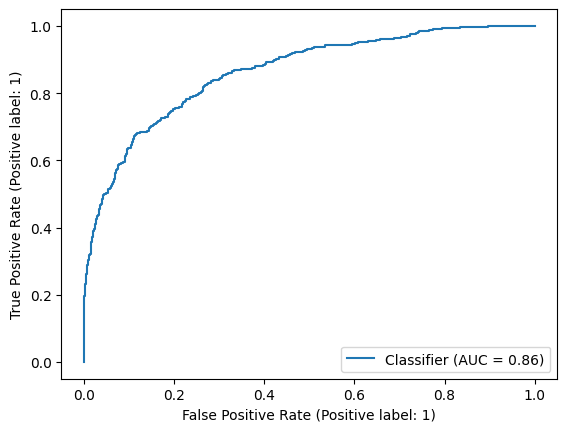

In [190]:
y_pred_proba = model.predict(X_test_scaled)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

# Final Model and Model Deployment

In [241]:
scaler = MinMaxScaler()

X['Gender'].replace({'Female':1,'Male':0},inplace=True)
X = pd.get_dummies(X,columns = ['Geography'], dtype=int)
X = scaler.fit_transform(X)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [242]:
model_f = Sequential()

model_f.add(Dense(32, activation="relu", input_dim=X.shape[1]))
model_f.add(Dropout(0.5))

model_f.add(Dense(16, activation="relu"))
model_f.add(Dropout(0.5))

model_f.add(Dense(8, activation="relu"))
model_f.add(Dropout(0.5))

model_f.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model_f.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [243]:
model_f.fit(x=X, y=y, validation_split=0.1, batch_size=32, epochs=200, verbose=0)

In [252]:
history = model_f.history.history

<Axes: >

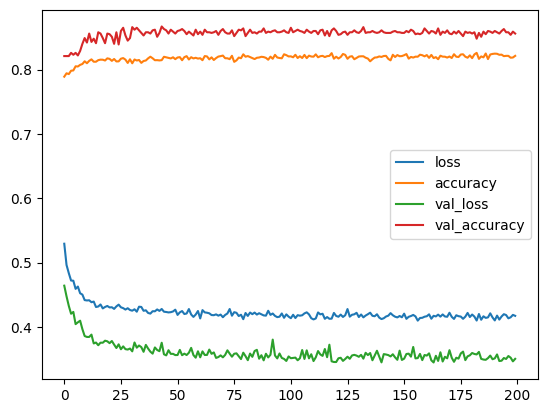

In [253]:
loss_df = pd.DataFrame(history)
loss_df.plot()

In [257]:
model.evaluate(X, y, verbose=0)

[0.3521021604537964, 0.8550000190734863, 0.5719195008277893]

## Prediction

In [247]:
model_f.save('Churn_Modelling.h5')

In [248]:
from tensorflow.keras.models import load_model

In [249]:
import pickle

In [266]:
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [271]:
scaler_churn = pickle.load(open("Churn_Modelling", "rb"))

In [272]:
pickle.dump(scaler, open("Churn_Modelling", "wb"))

In [273]:
model_churn = load_model('Churn_Modelling.h5')

In [276]:
scaler_churn = pickle.load(open("Churn_Modelling", "rb"))

In [283]:
df.Gender = df.Gender.replace({'Female':1,'Male':0},inplace=True)
df = pd.get_dummies(df,columns = ['Geography'], dtype=int)

In [291]:
example = df.drop('Exited', axis = 1).iloc[10:11, :]
example

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
10,528,None,31,6,102016.720,2,0,0,80181.120,1,0,0


In [292]:
example = scaler_churn.transform(example)
example

C:\Users\mathe\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([[5.2800000e+02,           nan, 3.1000000e+01, 6.0000000e+00,
        1.0201672e+05, 2.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        8.0181120e+04, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00]])

In [293]:
(model_churn.predict(example) > 0.5).astype("int32")

1/1 [==============================] - 0s 25ms/step


array([[1]])

In [294]:
model_churn.predict(example)

1/1 [==============================] - 0s 31ms/step


array([[0.5137875]], dtype=float32)

In [295]:
df["Exited"].iloc[10]

0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___